In [3]:
import pandas as pd
import numpy as np
import os
import sys
#from cnn import Classifier_CNN
import sklearn
import tensorflow as tf
from sktime.utils.load_data import load_from_tsfile_to_dataframe
from sktime.utils.data_container import from_nested_to_long
from sktime.utils.data_container import tabularize
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sktime.transformers.series_as_features.summarize import TSFreshFeatureExtractor
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sktime.utils.time_series import time_series_slope
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sktime.transformers.series_as_features.summarize import RandomIntervalFeatureExtractor
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sktime.classification.compose import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sktime.series_as_features.compose import FeatureUnion
from sktime.transformers.series_as_features.compose import RowTransformer
from sktime.transformers.series_as_features.reduce import Tabularizer
from sktime.transformers.series_as_features.segment import \
    RandomIntervalSegmenter
from sktime.transformers.series_as_features.compose import ColumnTransformer
from sktime.transformers.series_as_features.compose import RowTransformer
from sktime.transformers.series_as_features.rocket import Rocket
# with sktime, we can write this as a pipeline
from sktime.transformers.series_as_features.reduce import Tabularizer
from sklearn.pipeline import make_pipeline

import sktime as skt
import matplotlib.pyplot as plt
import seaborn as sns
from utils import dataset_selector
pd.set_option('max_colwidth', 4000)
plt.rcParams["figure.figsize"] = (20,3)

display(dataset_selector)

Dropdown(description='Dataset:', options=('ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY', 'AllGe…

['0' '1'] [14 14] 



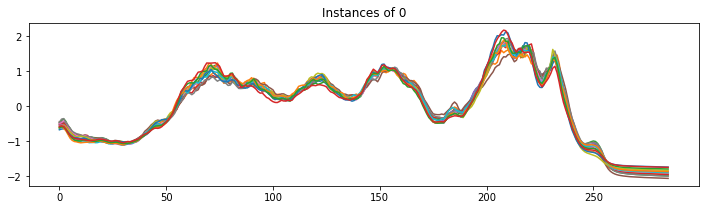

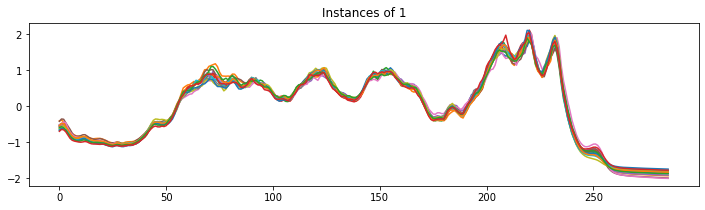

In [4]:
data_folder = 'data/Univariate_ts'
dataset_name = dataset_selector.value
train_dataset_path = os.path.join(data_folder, dataset_name, dataset_name+"_TRAIN.ts")
test_dataset_path = os.path.join(data_folder, dataset_name, dataset_name+"_TEST.ts")
X_train, y_train  = load_from_tsfile_to_dataframe(train_dataset_path, replace_missing_vals_with='Nan')
X_test, y_test = load_from_tsfile_to_dataframe(test_dataset_path, replace_missing_vals_with='NaN')
labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts, '\n')
for label in labels:
    fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
    for instance in X_train.loc[y_train == label, "dim_0"]:
        ax.plot(instance)
    ax.set(title=f"Instances of {label}")

In [5]:
num_classes = counts[0]
window_len = len(X_train.iloc[0].iloc[0])
X_train_tab = tabularize(X_train)
X_test_tab = tabularize(X_test)

y_train_one_hot = tf.one_hot(list([int(x) for x in y_train]), depth=num_classes)
y_test_one_hot = tf.one_hot(list([int(x) for x in y_test]), depth=num_classes)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tab.values, y_train_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tab.values, y_test_one_hot))

In [6]:
#for feat, targ in train_dataset.take(1):
 # print ('Features: {}, Target: {}'.format(feat, targ))
 

In [7]:
BATCH_SIZE = 4
SHUFFLE_BUFFER_SIZE = 10

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
from tensorflow.keras import layers
input_layer = keras.layers.Input(input_shape)

conv1 = tf.keras.layers.Conv1D(filters=6,kernel_size=7,activation='sigmoid')(input_layer)
conv1 = keras.layers.AveragePooling1D(pool_size=3)(conv1)
conv2 = keras.layers.Conv1D(filters=12,kernel_size=7,activation='sigmoid')(conv1)
conv2 = keras.layers.AveragePooling1D(pool_size=3)(conv2)

flatten_layer = keras.layers.Flatten()(conv2)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=10)

NameError: name 'keras' is not defined

In [105]:
dataset = pd.read_csv('diabetes.csv')
X= dataset.iloc[:,0:8]
y= dataset.iloc[:,8]

In [109]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [110]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [114]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 4)                 1148      
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 5         
Total params: 1,173
Trainable params: 1,173
Non-trainable params: 0
_________________________________________________________________


In [115]:
286*4

1144